# 데이터 불러오기



좌표변환 api key : devU01TX0FVVEgyMDIwMDIxODE2NTE1ODEwOTQ3NTk=

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('max_columns', 465)

In [3]:
raw_data = pd.read_csv("dentset.csv")

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6,11,17,19,34,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150688 entries, 0 to 150687
Data columns (total 54 columns):
진료일자          150688 non-null object
차트번호          150688 non-null int64
총진료비          150688 non-null int64
공단부담금         150688 non-null int64
총본인부담금        150688 non-null int64
보험본인부담금       150688 non-null int64
비보험금          150688 non-null object
할인금액          150688 non-null int64
절사금액          150688 non-null int64
총카드수납         150688 non-null int64
총현금승인수납       150688 non-null int64
총현금수납         150688 non-null object
총온라인수납        150688 non-null int64
총수납금액         150688 non-null int64
건강생활유지비승인액    150688 non-null int64
수납일자          150688 non-null object
진료내역(처치명)     130139 non-null object
메모            533 non-null object
공제여부          150688 non-null object
부가세           150688 non-null object
전자서명          150688 non-null object
미수금           150688 non-null int64
선수금           150688 non-null int64
최초내원          150688 non-null object
최종내원          1506

In [5]:
raw_data.head()

,진료일자,차트번호,총진료비,공단부담금,총본인부담금,보험본인부담금,비보험금,할인금액,절사금액,총카드수납,총현금승인수납,총현금수납,총온라인수납,총수납금액,건강생활유지비승인액,수납일자,진료내역(처치명),메모,공제여부,부가세,전자서명,미수금,선수금,최초내원,최종내원,주소,연,반기,분기,월,일,요일,주,보험수입,일반수입,수입합계,내원횟수,전환여부,유지여부,미내원기간,유지기간,국적,성별,출생연도,나이,연령1,연령2,연령3,내원경로2,내원경로(대)9,내원경로(소)10,시도,시군구,읍면동
0,2008-09-05,140,34070,33070,1000,1000,0,0,0,0,0,1000,0,1000,0,2008-09-05,"가압근충, 러버댐",NaN,○,0,X,0,0,2008-08-20,2008-09-18,수성구 지산동 434번지 201호,2008,하반기,3분기,8,20,수,34,186710,0,186710,5,전환,이탈,4169,0,내국인,여,1994.0,14.0,10.0,0,0,NaN,NaN,NaN,대구,수성구,지산동
1,2008-09-05,281,50360,35260,15100,15100,0,0,0,31800,0,0,0,31800,0,2008-09-05,"아말감충전 2면, 후상치조신경, 치근단",NaN,○,0,X,0,16700,2008-09-05,2008-09-05,만촌1동 670-26,2008,하반기,3분기,9,5,금,36,79240,0,79240,3,전환,이탈,4182,0,내국인,남,1978.0,30.0,30.0,20,30,NaN,NaN,NaN,대구,수성구,만촌1동
2,2008-09-05,234,66020,46220,19800,19800,0,0,0,21000,0,0,0,21000,0,2008-09-05,"발치 발치, 복잡매복",NaN,○,0,X,0,1200,2008-09-01,2008-12-18,경북 영천시 임고면 덕연리 217,2008,하반기,3분기,9,1,월,36,270920,123000,393920,13,전환,이탈,4078,0,내국인,남,1981.0,27.0,20.0,20,0,NaN,NaN,NaN,경북,영천시,임고면
3,2008-09-05,282,33110,16410,16700,7000,9700,0,0,0,0,0,0,0,0,2008-09-05,"치석제거, 치근단, 수복물제거 간단, 보통처치",NaN,○,0,X,16700,0,2008-09-05,2008-09-05,만촌1동670-26,2008,하반기,3분기,9,5,금,36,56790,9700,66490,2,전환,이탈,4182,0,내국인,여,1952.0,56.0,50.0,40,30,NaN,NaN,NaN,대구,수성구,만촌1동
4,2008-09-05,287,102890,22890,80000,9800,70200,0,0,80000,0,0,0,80000,0,2008-09-05,"침윤마취, 치근단, 수복물제거 간단",NaN,○,0,X,0,0,2008-09-05,2008-09-05,만촌 3동 수성 2차 e 편한 세상 102/1801,2008,하반기,3분기,9,5,금,36,106970,440200,547170,6,전환,이탈,4182,0,내국인,여,1961.0,47.0,40.0,40,30,NaN,NaN,NaN,대구,수성구,만촌3동


# 피쳐 생성, 불필요한 피쳐 드랍

In [6]:
raw_data["비부담금"] = raw_data["총진료비"] - raw_data["총본인부담금"]

In [7]:
raw_data.drop(["차트번호", '공단부담금', '보험본인부담금','비보험금', '할인금액', '절사금액', '총카드수납', '총현금승인수납', '총현금수납', '총온라인수납','총수납금액','건강생활유지비승인액', '메모', '공제여부', '부가세', '전자서명', '유지여부', "내원횟수"], axis='columns', inplace=True)

In [8]:
raw_data.columns

Index(['진료일자', '총진료비', '총본인부담금', '수납일자', '진료내역(처치명)', '미수금', '선수금', '최초내원',
       '최종내원', '주소', '연', '반기', '분기', '월', '일', '요일', '주', '보험수입', '일반수입',
       '수입합계', '전환여부', ' 미내원기간 ', '유지기간', '국적', '성별', '출생연도', '나이', '연령1',
       '연령2', '연령3', '내원경로2', '내원경로(대)9', '내원경로(소)10', '시도', '시군구', '읍면동',
       '비부담금'],
      dtype='object')

# 결측값 처리

In [9]:
from tqdm import tqdm_notebook

In [10]:
raw_data.isnull().sum()

진료일자              0
총진료비              0
총본인부담금            0
수납일자              0
진료내역(처치명)     20549
미수금               0
선수금               0
최초내원              0
최종내원              0
주소                0
연                 0
반기                0
분기                0
월                 0
일                 0
요일                0
주                 0
보험수입              0
일반수입              0
수입합계              0
전환여부              0
 미내원기간            0
유지기간           3048
국적               13
성별              232
출생연도            232
나이              232
연령1             232
연령2               0
연령3               0
내원경로2            44
내원경로(대)9     126828
내원경로(소)10    126828
시도                0
시군구               0
읍면동               0
비부담금              0
dtype: int64

In [11]:
raw_data["진료내역(처치명)"] = raw_data["진료내역(처치명)"].fillna("None")
raw_data["내원경로2"] = raw_data["내원경로2"].fillna("None")
raw_data["내원경로(대)9"] = raw_data["내원경로(대)9"].fillna("None")
raw_data["내원경로(소)10"] = raw_data["내원경로(소)10"].fillna("None")
raw_data["유지기간"] = raw_data["유지기간"].fillna(0)
raw_data["국적"] = raw_data["국적"].fillna("내국인")

In [12]:
route = []
for idx, member in tqdm_notebook(raw_data.iterrows()):
    if member["내원경로2"] == "0" or member["내원경로2"] == "None":
        route.append("None")
    else :
        route.append(member["내원경로2"])
    
raw_data["내원경로2"] = route

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


불필요한 값 제거

진료항목 인코딩

In [13]:
raw_data = raw_data.dropna(axis=0)
raw_data.isnull().sum()

진료일자         0
총진료비         0
총본인부담금       0
수납일자         0
진료내역(처치명)    0
미수금          0
선수금          0
최초내원         0
최종내원         0
주소           0
연            0
반기           0
분기           0
월            0
일            0
요일           0
주            0
보험수입         0
일반수입         0
수입합계         0
전환여부         0
 미내원기간       0
유지기간         0
국적           0
성별           0
출생연도         0
나이           0
연령1          0
연령2          0
연령3          0
내원경로2        0
내원경로(대)9     0
내원경로(소)10    0
시도           0
시군구          0
읍면동          0
비부담금         0
dtype: int64

In [14]:
treatset = set()
for idx, member in tqdm_notebook(raw_data.iterrows()):
    treat = list(member["진료내역(처치명)"].split(", "))
    for a in treat :
        treatset.add(a)

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [15]:
## 진단명별 칼럼 생성
bar = tqdm_notebook(treatset)
for treat in bar :
    raw_data[treat] = 0

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [16]:
treat_dict = {}
for treat in treatset :
    treat_dict[treat] = []

In [17]:
for idx, member in tqdm_notebook(raw_data.iterrows()):
    treats = list(member["진료내역(처치명)"].split(", "))
    for treat in treat_dict :
        if treat in treats :
            treat_dict[treat].append(1)
        else :
            treat_dict[treat].append(0)

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [18]:
for treat in tqdm_notebook(treatset) :
    raw_data[treat] = treat_dict[treat]

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


# 시각화

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
gender = raw_data['성별'].value_counts()

In [22]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

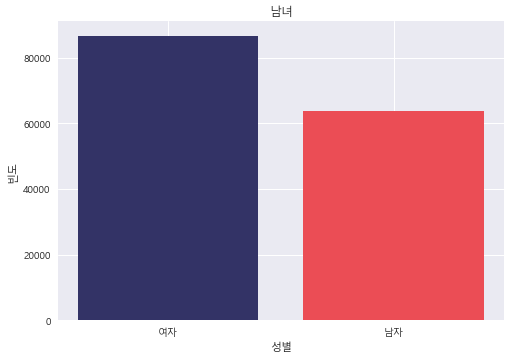

In [41]:
plt.bar(gender.index,gender, color =['#333366','#eb4d55']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(gender.index, ['여자','남자']) # x축을 여자,남자 범주로 변환
plt.title('남녀')
plt.xlabel('성별')
plt.ylabel('빈도')
plt.show()
#편견 없는 사람입니다. 이유를 아신다면 당신은 지성인이네요!

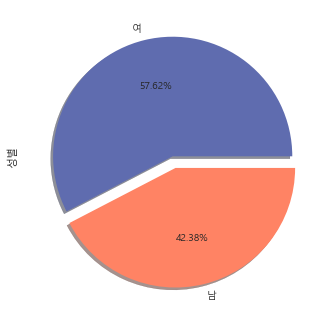

In [42]:
gender.plot.pie(explode=[0,0.1],autopct='%1.2f%%',shadow=True, labels =['여','남'],colors =['#5f6caf','#ff8364']) 
plt.show()

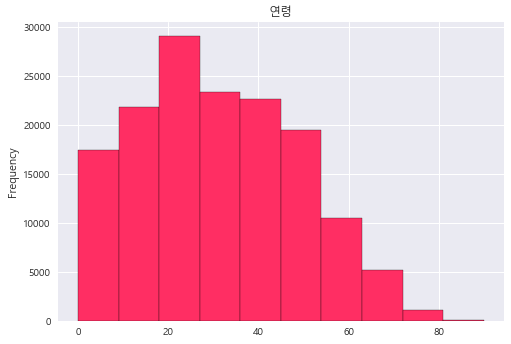

In [46]:
raw_data['연령1'].plot.hist(bins=10,color='#ff2e63',edgecolor='black')
plt.title('연령')
plt.show()

In [31]:
#{진단명 : 누적 숫자, [누적 진료액], [연령] ]

for treat in tqdm_notebook(treatset) :
    treat_dict[treat] = sum(treat_dict[treat])
treat_dict

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


{'가.치은절제술': 184,
 '수복물': 1,
 '교정ext': 4,
 '아말감충전-4면': 2,
 '발치 발치': 1758,
 '부분틀니-임시부분틀니': 2,
 'KF충전-2면': 60,
 'KM즉처 2면': 3,
 '보    존-응급근관처치': 23,
 '치수복조': 19,
 '복잡': 53,
 '예방-TBI': 4,
 'X-ray-악관절촬영': 236,
 'cr/s-temp cement': 2,
 'ANYONE INTERNAL [AO]': 2,
 '보존-GI충전(C)': 1,
 'cr/s-G-one': 33,
 'Cr.L': 52,
 'core': 20,
 'Ast 연결': 3,
 'KF즉처-1면': 986,
 '근관치료-근관확대2': 1459,
 'Crown-SS': 13,
 'OMP': 182,
 '수복물?': 1,
 'KF충전-1면': 44,
 'Flap-치은박리소파술(복잡)': 2,
 'GI충전 3면': 62,
 '근관내기존충전물제거': 4,
 '마취-하치조신경': 2278,
 'Crown-PFM': 1,
 '보존-INLAY': 3,
 '기타-Re-Endo(30일 이내)': 1,
 '의치수리조정-교합조정(단순)': 59,
 'UF(II) MG+': 1,
 '치은판절제술': 39,
 '2면': 58,
 '틀니무상유지관리': 17,
 'None': 20531,
 '소아치료-치수절단': 101,
 '(준용)불소도포': 1,
 '아말감충전 2면': 173,
 'GI즉처 3면': 389,
 '측두하악장애분석검사': 325,
 'GI충전 4면': 2,
 'GI즉처-2면': 715,
 '지각과민처치': 122,
 '구강내봉합(나-1)': 2,
 'RC-Prep': 394,
 '근관세척2': 9,
 'Cr.P/I': 61,
 '진단 및 치료계획': 42,
 'KF즉처-2면': 555,
 '보존-ONLAY(심미)': 2,
 '치근절제술(가)': 1,
 '보    존-지각과민처치': 3769,
 'CK': 194,
 'H/S 체결': 1,
 'space clos

In [36]:
#raw_data.loc[raw_data['진단명'] == 1]['총진료비'].mean()

raw_data.loc[raw_data['근관치료-발수'] == 1]['총진료비'].mean()

260231.28755364806

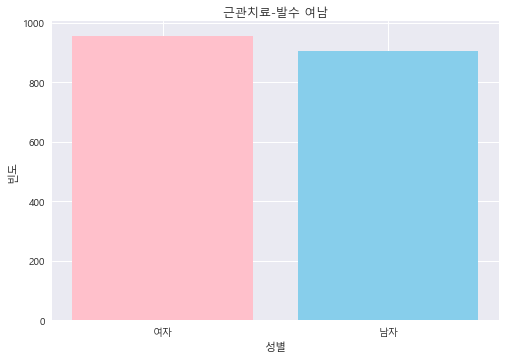

In [40]:
gb = raw_data.loc[raw_data['근관치료-발수'] == 1]['성별'].value_counts()
plt.bar(gb.index,gb, color =['pink','skyblue']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(gender.index, ['여자','남자']) # x축을 여자,남자 범주로 변환
plt.title('근관치료-발수 여남')
plt.xlabel('성별')
plt.ylabel('빈도')
plt.show()

# 분류학습 전 다시 전처리

분류학습을 위해 적합한 피쳐들을 다시 추린다  
(일자와 유지기간 등은 y값에 직접적으로 영향을 주기 때문에, 주소, 일, 주는 무의미한 더미변수 생성을 방지하기 위해)

In [100]:
raw_data.drop(["진료일자", "수납일자", "진료내역(처치명)", "최초내원", "최종내원", "주소", '일',"주", '유지기간', '보험수입', '일반수입', " 미내원기간 ", '수입합계'], axis='columns', inplace=True)

In [101]:
raw_data["총진료비"] = np.log(raw_data['총진료비'])
raw_data["총본인부담금"] = np.log(raw_data['총본인부담금'])
raw_data["미수금"] = np.log(raw_data['미수금'])
raw_data["선수금"] = np.log(raw_data['선수금'])
raw_data["비부담금"] = np.log(raw_data['비부담금'])

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [102]:
from sklearn.preprocessing import LabelEncoder
cols = ('연', '반기', '분기', '월', '요일', '국적', '성별', '출생연도', '나이','연령1', '연령2', '연령3',
       '내원경로2', '내원경로(대)9', '내원경로(소)10', '시도', '시군구', '읍면동')
le = LabelEncoder()
for col in cols :
    le.fit(raw_data[col])
    raw_data[col] = le.transform(raw_data[col]) 

# shape        
print('Shape all_data: {}'.format(raw_data.shape))

Shape all_data: (150456, 460)


In [104]:
remain = []

for idx, member in raw_data.iterrows():
    if member["전환여부"] == "전환" :
        remain.append(0)
    else :
        remain.append(1)

raw_data["전환여부"] = remain

In [105]:
li1 = []
li2 = []
li3 = []
li4 = []
li5 = []
for idx, member in tqdm_notebook(raw_data.iterrows()):
    if str(member["총진료비"]) == '-inf':
        li1.append("0")
    else :
        li1.append(member["총진료비"])
        
    if str(member["총본인부담금"]) == '-inf':
        li2.append("0")
    else :
        li2.append(member["총본인부담금"])
        
    if str(member["미수금"]) == '-inf':
        li3.append("0")
    else :
        li3.append(member["미수금"])
        
    if str(member["선수금"]) == '-inf':
        li4.append("0")
    else :
        li4.append(member["선수금"])
        
    if str(member["비부담금"]) == '-inf':
        li5.append("0")
    else :
        li5.append(member["비부담금"])

c:\users\liram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [106]:
raw_data["총진료비"] = li1
raw_data["총본인부담금"] = li2
raw_data["미수금"] = li3
raw_data["선수금"] = li4
raw_data["비부담금"] = li5

In [107]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150456 entries, 0 to 150687
Columns: 460 entries, 총진료비 to ext-1
dtypes: int32(11), int64(444), object(5)
memory usage: 522.9+ MB


Train, Test 분리

In [108]:
y = np.array(raw_data['전환여부'])
X = X = np.array(raw_data.loc[:, raw_data.columns != '전환여부'].values)

In [109]:
X.shape, y.shape

((150456, 459), (150456,))

In [110]:
# Train, Test 셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [111]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120364, 459), (120364,), (30092, 459), (30092,))

In [112]:
from sklearn.ensemble import RandomForestClassifier

# module loading
rfc = RandomForestClassifier()

# train data!
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
from sklearn import metrics

In [114]:
# make predicition
prediction = rfc.predict(X_test)
print(prediction.shape)

(30092,)


In [115]:
metrics.confusion_matrix(y_test, prediction)

array([[29446,    47],
       [  503,    96]], dtype=int64)

In [116]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test, prediction))
print('Recall Score:')
print(metrics.recall_score(y_test, prediction))
print('Precision Score:')
print(metrics.precision_score(y_test, prediction))

Accuracy Score:
0.9817227170011963
Recall Score:
0.16026711185308848
Precision Score:
0.6713286713286714


RandomUnderSampler

In [129]:
from imblearn.under_sampling import RandomUnderSampler

Xresampled, yresampled = RandomUnderSampler( random_state=0).fit_sample(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [124]:
Xresampled.shape, yresampled.shape

((4864, 459), (4864,))

In [118]:
# module loading
rfc2 = RandomForestClassifier()

# train data!
rfc.fit(Xresampled, yresampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
# make predicition
prediction = rfc.predict(X_test)
print(prediction.shape)

(30092,)


In [120]:
metrics.confusion_matrix(y_test, prediction)

array([[26598,  2895],
       [    7,   592]], dtype=int64)

In [121]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test, prediction))
print('Recall Score:')
print(metrics.recall_score(y_test, prediction))
print('Precision Score:')
print(metrics.precision_score(y_test, prediction))

Accuracy Score:
0.903562408613585
Recall Score:
0.988313856427379
Precision Score:
0.16977344422139376


In [130]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

Learning rate set to 0.079672
0:	learn: 0.4631412	total: 100ms	remaining: 1m 40s
1:	learn: 0.3254323	total: 125ms	remaining: 1m 2s
2:	learn: 0.2438804	total: 160ms	remaining: 53.3s
3:	learn: 0.1914748	total: 186ms	remaining: 46.2s
4:	learn: 0.1602850	total: 211ms	remaining: 42s
5:	learn: 0.1327848	total: 237ms	remaining: 39.2s
6:	learn: 0.1154742	total: 262ms	remaining: 37.2s
7:	learn: 0.1058296	total: 285ms	remaining: 35.4s
8:	learn: 0.0896946	total: 311ms	remaining: 34.2s
9:	learn: 0.0834887	total: 336ms	remaining: 33.2s
10:	learn: 0.0750577	total: 369ms	remaining: 33.1s
11:	learn: 0.0694075	total: 396ms	remaining: 32.6s
12:	learn: 0.0667069	total: 421ms	remaining: 32s
13:	learn: 0.0639102	total: 446ms	remaining: 31.4s
14:	learn: 0.0617133	total: 480ms	remaining: 31.5s
15:	learn: 0.0604990	total: 572ms	remaining: 35.2s
16:	learn: 0.0588995	total: 627ms	remaining: 36.3s
17:	learn: 0.0581275	total: 691ms	remaining: 37.7s
18:	learn: 0.0572777	total: 735ms	remaining: 37.9s
19:	learn: 0.0

166:	learn: 0.0413494	total: 5.35s	remaining: 26.7s
167:	learn: 0.0413007	total: 5.37s	remaining: 26.6s
168:	learn: 0.0412556	total: 5.4s	remaining: 26.5s
169:	learn: 0.0412141	total: 5.43s	remaining: 26.5s
170:	learn: 0.0411677	total: 5.46s	remaining: 26.5s
171:	learn: 0.0410823	total: 5.49s	remaining: 26.4s
172:	learn: 0.0410240	total: 5.52s	remaining: 26.4s
173:	learn: 0.0410095	total: 5.54s	remaining: 26.3s
174:	learn: 0.0409837	total: 5.57s	remaining: 26.2s
175:	learn: 0.0409494	total: 5.59s	remaining: 26.2s
176:	learn: 0.0409313	total: 5.62s	remaining: 26.1s
177:	learn: 0.0408942	total: 5.64s	remaining: 26.1s
178:	learn: 0.0408513	total: 5.67s	remaining: 26s
179:	learn: 0.0408223	total: 5.69s	remaining: 25.9s
180:	learn: 0.0408000	total: 5.72s	remaining: 25.9s
181:	learn: 0.0407953	total: 5.74s	remaining: 25.8s
182:	learn: 0.0407473	total: 5.76s	remaining: 25.7s
183:	learn: 0.0406863	total: 5.79s	remaining: 25.7s
184:	learn: 0.0406370	total: 5.82s	remaining: 25.6s
185:	learn: 0.0

329:	learn: 0.0369055	total: 10.1s	remaining: 20.5s
330:	learn: 0.0368833	total: 10.1s	remaining: 20.4s
331:	learn: 0.0368582	total: 10.1s	remaining: 20.4s
332:	learn: 0.0368351	total: 10.2s	remaining: 20.4s
333:	learn: 0.0368001	total: 10.2s	remaining: 20.3s
334:	learn: 0.0367912	total: 10.2s	remaining: 20.3s
335:	learn: 0.0367524	total: 10.2s	remaining: 20.3s
336:	learn: 0.0367399	total: 10.3s	remaining: 20.2s
337:	learn: 0.0367197	total: 10.3s	remaining: 20.2s
338:	learn: 0.0367113	total: 10.3s	remaining: 20.1s
339:	learn: 0.0366986	total: 10.3s	remaining: 20.1s
340:	learn: 0.0366634	total: 10.4s	remaining: 20s
341:	learn: 0.0366451	total: 10.4s	remaining: 20s
342:	learn: 0.0366205	total: 10.4s	remaining: 20s
343:	learn: 0.0366079	total: 10.4s	remaining: 19.9s
344:	learn: 0.0365802	total: 10.5s	remaining: 19.9s
345:	learn: 0.0365600	total: 10.5s	remaining: 19.8s
346:	learn: 0.0365264	total: 10.5s	remaining: 19.8s
347:	learn: 0.0365195	total: 10.5s	remaining: 19.7s
348:	learn: 0.0365

494:	learn: 0.0340563	total: 14.8s	remaining: 15.1s
495:	learn: 0.0340420	total: 14.8s	remaining: 15.1s
496:	learn: 0.0340322	total: 14.8s	remaining: 15s
497:	learn: 0.0339974	total: 14.9s	remaining: 15s
498:	learn: 0.0339929	total: 14.9s	remaining: 15s
499:	learn: 0.0339895	total: 14.9s	remaining: 14.9s
500:	learn: 0.0339584	total: 15s	remaining: 14.9s
501:	learn: 0.0339445	total: 15s	remaining: 14.9s
502:	learn: 0.0339275	total: 15s	remaining: 14.8s
503:	learn: 0.0339105	total: 15s	remaining: 14.8s
504:	learn: 0.0338668	total: 15.1s	remaining: 14.8s
505:	learn: 0.0338466	total: 15.1s	remaining: 14.7s
506:	learn: 0.0338297	total: 15.1s	remaining: 14.7s
507:	learn: 0.0338224	total: 15.1s	remaining: 14.7s
508:	learn: 0.0337986	total: 15.2s	remaining: 14.6s
509:	learn: 0.0337592	total: 15.2s	remaining: 14.6s
510:	learn: 0.0337223	total: 15.2s	remaining: 14.6s
511:	learn: 0.0337184	total: 15.3s	remaining: 14.5s
512:	learn: 0.0337060	total: 15.3s	remaining: 14.5s
513:	learn: 0.0336996	tota

659:	learn: 0.0314257	total: 19.2s	remaining: 9.88s
660:	learn: 0.0314164	total: 19.2s	remaining: 9.86s
661:	learn: 0.0314036	total: 19.3s	remaining: 9.83s
662:	learn: 0.0314035	total: 19.3s	remaining: 9.8s
663:	learn: 0.0313924	total: 19.3s	remaining: 9.78s
664:	learn: 0.0313923	total: 19.4s	remaining: 9.75s
665:	learn: 0.0313650	total: 19.4s	remaining: 9.72s
666:	learn: 0.0313629	total: 19.4s	remaining: 9.69s
667:	learn: 0.0313550	total: 19.4s	remaining: 9.65s
668:	learn: 0.0313514	total: 19.4s	remaining: 9.62s
669:	learn: 0.0313513	total: 19.5s	remaining: 9.59s
670:	learn: 0.0313405	total: 19.5s	remaining: 9.56s
671:	learn: 0.0313351	total: 19.5s	remaining: 9.54s
672:	learn: 0.0313261	total: 19.6s	remaining: 9.51s
673:	learn: 0.0313212	total: 19.6s	remaining: 9.49s
674:	learn: 0.0313120	total: 19.7s	remaining: 9.46s
675:	learn: 0.0312938	total: 19.7s	remaining: 9.43s
676:	learn: 0.0312771	total: 19.7s	remaining: 9.4s
677:	learn: 0.0312770	total: 19.7s	remaining: 9.37s
678:	learn: 0.

820:	learn: 0.0295997	total: 23.6s	remaining: 5.15s
821:	learn: 0.0295996	total: 23.6s	remaining: 5.12s
822:	learn: 0.0295941	total: 23.7s	remaining: 5.09s
823:	learn: 0.0295677	total: 23.7s	remaining: 5.06s
824:	learn: 0.0295626	total: 23.7s	remaining: 5.03s
825:	learn: 0.0295468	total: 23.7s	remaining: 5s
826:	learn: 0.0295347	total: 23.8s	remaining: 4.97s
827:	learn: 0.0295277	total: 23.8s	remaining: 4.94s
828:	learn: 0.0295254	total: 23.8s	remaining: 4.91s
829:	learn: 0.0295017	total: 23.8s	remaining: 4.88s
830:	learn: 0.0295001	total: 23.9s	remaining: 4.85s
831:	learn: 0.0294899	total: 23.9s	remaining: 4.82s
832:	learn: 0.0294629	total: 23.9s	remaining: 4.79s
833:	learn: 0.0294530	total: 23.9s	remaining: 4.76s
834:	learn: 0.0294499	total: 24s	remaining: 4.73s
835:	learn: 0.0294253	total: 24s	remaining: 4.7s
836:	learn: 0.0294000	total: 24s	remaining: 4.67s
837:	learn: 0.0293943	total: 24s	remaining: 4.65s
838:	learn: 0.0293842	total: 24.1s	remaining: 4.62s
839:	learn: 0.0293753	to

983:	learn: 0.0279459	total: 27.9s	remaining: 453ms
984:	learn: 0.0279432	total: 27.9s	remaining: 425ms
985:	learn: 0.0279298	total: 27.9s	remaining: 397ms
986:	learn: 0.0279194	total: 28s	remaining: 368ms
987:	learn: 0.0279024	total: 28s	remaining: 340ms
988:	learn: 0.0278834	total: 28s	remaining: 312ms
989:	learn: 0.0278716	total: 28s	remaining: 283ms
990:	learn: 0.0278666	total: 28.1s	remaining: 255ms
991:	learn: 0.0278493	total: 28.1s	remaining: 227ms
992:	learn: 0.0278405	total: 28.1s	remaining: 198ms
993:	learn: 0.0278292	total: 28.2s	remaining: 170ms
994:	learn: 0.0278038	total: 28.2s	remaining: 142ms
995:	learn: 0.0277830	total: 28.2s	remaining: 113ms
996:	learn: 0.0277738	total: 28.3s	remaining: 85ms
997:	learn: 0.0277693	total: 28.3s	remaining: 56.7ms
998:	learn: 0.0277583	total: 28.3s	remaining: 28.3ms
999:	learn: 0.0277392	total: 28.3s	remaining: 0us


In [131]:
cbc_pred = cbc.predict(X_test)
print(metrics.confusion_matrix(y_test, cbc_pred))

[[29367   126]
 [  405   194]]


In [134]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test, cbc_pred))
print('Recall Score:')
print(metrics.recall_score(y_test, cbc_pred))
print('Precision Score:')
print(metrics.precision_score(y_test, cbc_pred))

Accuracy Score:
0.9823541140502459
Recall Score:
0.32387312186978295
Precision Score:
0.60625


In [135]:
cbc = CatBoostClassifier()
cbc.fit(Xresampled, yresampled)

Learning rate set to 0.020243
0:	learn: 0.6687882	total: 4.91ms	remaining: 4.9s
1:	learn: 0.6429110	total: 9.3ms	remaining: 4.64s
2:	learn: 0.6184175	total: 13.8ms	remaining: 4.59s
3:	learn: 0.5957761	total: 18.3ms	remaining: 4.55s
4:	learn: 0.5697813	total: 22.7ms	remaining: 4.52s
5:	learn: 0.5446094	total: 27ms	remaining: 4.47s
6:	learn: 0.5272721	total: 31.1ms	remaining: 4.41s
7:	learn: 0.5082704	total: 35.3ms	remaining: 4.38s
8:	learn: 0.4898422	total: 39.6ms	remaining: 4.36s
9:	learn: 0.4755714	total: 43.9ms	remaining: 4.35s
10:	learn: 0.4577619	total: 48.5ms	remaining: 4.36s
11:	learn: 0.4454947	total: 53.2ms	remaining: 4.38s
12:	learn: 0.4319997	total: 57.6ms	remaining: 4.38s
13:	learn: 0.4193069	total: 62.3ms	remaining: 4.39s
14:	learn: 0.4068970	total: 66.8ms	remaining: 4.38s
15:	learn: 0.3952921	total: 71.5ms	remaining: 4.39s
16:	learn: 0.3856585	total: 75.9ms	remaining: 4.39s
17:	learn: 0.3790012	total: 80ms	remaining: 4.37s
18:	learn: 0.3699589	total: 84.6ms	remaining: 4.37

194:	learn: 0.1744682	total: 859ms	remaining: 3.55s
195:	learn: 0.1742459	total: 864ms	remaining: 3.54s
196:	learn: 0.1740596	total: 868ms	remaining: 3.54s
197:	learn: 0.1739945	total: 873ms	remaining: 3.54s
198:	learn: 0.1736907	total: 878ms	remaining: 3.53s
199:	learn: 0.1735390	total: 882ms	remaining: 3.53s
200:	learn: 0.1733598	total: 886ms	remaining: 3.52s
201:	learn: 0.1731861	total: 891ms	remaining: 3.52s
202:	learn: 0.1729817	total: 895ms	remaining: 3.51s
203:	learn: 0.1728268	total: 899ms	remaining: 3.51s
204:	learn: 0.1726986	total: 905ms	remaining: 3.51s
205:	learn: 0.1726392	total: 911ms	remaining: 3.51s
206:	learn: 0.1724719	total: 919ms	remaining: 3.52s
207:	learn: 0.1722954	total: 926ms	remaining: 3.52s
208:	learn: 0.1721226	total: 933ms	remaining: 3.53s
209:	learn: 0.1719678	total: 938ms	remaining: 3.53s
210:	learn: 0.1718142	total: 943ms	remaining: 3.52s
211:	learn: 0.1717240	total: 951ms	remaining: 3.53s
212:	learn: 0.1716230	total: 963ms	remaining: 3.56s
213:	learn: 

363:	learn: 0.1542227	total: 1.73s	remaining: 3.02s
364:	learn: 0.1541667	total: 1.73s	remaining: 3.02s
365:	learn: 0.1541342	total: 1.74s	remaining: 3.01s
366:	learn: 0.1540748	total: 1.75s	remaining: 3.01s
367:	learn: 0.1540007	total: 1.75s	remaining: 3.01s
368:	learn: 0.1539333	total: 1.76s	remaining: 3.01s
369:	learn: 0.1538417	total: 1.76s	remaining: 3s
370:	learn: 0.1537697	total: 1.77s	remaining: 3s
371:	learn: 0.1536383	total: 1.77s	remaining: 2.99s
372:	learn: 0.1536090	total: 1.78s	remaining: 2.99s
373:	learn: 0.1534104	total: 1.78s	remaining: 2.98s
374:	learn: 0.1532690	total: 1.79s	remaining: 2.98s
375:	learn: 0.1530571	total: 1.79s	remaining: 2.97s
376:	learn: 0.1529610	total: 1.8s	remaining: 2.97s
377:	learn: 0.1528969	total: 1.8s	remaining: 2.96s
378:	learn: 0.1528492	total: 1.8s	remaining: 2.96s
379:	learn: 0.1528297	total: 1.81s	remaining: 2.95s
380:	learn: 0.1527947	total: 1.81s	remaining: 2.95s
381:	learn: 0.1527817	total: 1.82s	remaining: 2.94s
382:	learn: 0.1525526

550:	learn: 0.1371316	total: 2.59s	remaining: 2.11s
551:	learn: 0.1369294	total: 2.59s	remaining: 2.1s
552:	learn: 0.1368628	total: 2.6s	remaining: 2.1s
553:	learn: 0.1367603	total: 2.6s	remaining: 2.09s
554:	learn: 0.1366114	total: 2.61s	remaining: 2.09s
555:	learn: 0.1364809	total: 2.61s	remaining: 2.08s
556:	learn: 0.1363368	total: 2.61s	remaining: 2.08s
557:	learn: 0.1362172	total: 2.62s	remaining: 2.08s
558:	learn: 0.1361104	total: 2.62s	remaining: 2.07s
559:	learn: 0.1359157	total: 2.63s	remaining: 2.06s
560:	learn: 0.1358929	total: 2.63s	remaining: 2.06s
561:	learn: 0.1358059	total: 2.64s	remaining: 2.05s
562:	learn: 0.1357947	total: 2.64s	remaining: 2.05s
563:	learn: 0.1356750	total: 2.64s	remaining: 2.04s
564:	learn: 0.1356199	total: 2.65s	remaining: 2.04s
565:	learn: 0.1354746	total: 2.65s	remaining: 2.03s
566:	learn: 0.1353558	total: 2.66s	remaining: 2.03s
567:	learn: 0.1352376	total: 2.66s	remaining: 2.02s
568:	learn: 0.1351498	total: 2.67s	remaining: 2.02s
569:	learn: 0.13

738:	learn: 0.1203202	total: 3.45s	remaining: 1.22s
739:	learn: 0.1202355	total: 3.46s	remaining: 1.21s
740:	learn: 0.1201984	total: 3.46s	remaining: 1.21s
741:	learn: 0.1201307	total: 3.47s	remaining: 1.21s
742:	learn: 0.1199718	total: 3.47s	remaining: 1.2s
743:	learn: 0.1199129	total: 3.48s	remaining: 1.2s
744:	learn: 0.1198267	total: 3.48s	remaining: 1.19s
745:	learn: 0.1197737	total: 3.49s	remaining: 1.19s
746:	learn: 0.1196136	total: 3.49s	remaining: 1.18s
747:	learn: 0.1194853	total: 3.5s	remaining: 1.18s
748:	learn: 0.1192986	total: 3.5s	remaining: 1.17s
749:	learn: 0.1192431	total: 3.51s	remaining: 1.17s
750:	learn: 0.1191721	total: 3.51s	remaining: 1.16s
751:	learn: 0.1190386	total: 3.52s	remaining: 1.16s
752:	learn: 0.1189688	total: 3.52s	remaining: 1.15s
753:	learn: 0.1189261	total: 3.52s	remaining: 1.15s
754:	learn: 0.1189202	total: 3.53s	remaining: 1.15s
755:	learn: 0.1187940	total: 3.53s	remaining: 1.14s
756:	learn: 0.1187620	total: 3.54s	remaining: 1.14s
757:	learn: 0.11

931:	learn: 0.1075144	total: 4.32s	remaining: 315ms
932:	learn: 0.1074603	total: 4.33s	remaining: 311ms
933:	learn: 0.1074402	total: 4.33s	remaining: 306ms
934:	learn: 0.1074050	total: 4.34s	remaining: 301ms
935:	learn: 0.1073721	total: 4.34s	remaining: 297ms
936:	learn: 0.1073295	total: 4.35s	remaining: 292ms
937:	learn: 0.1073265	total: 4.35s	remaining: 288ms
938:	learn: 0.1072931	total: 4.36s	remaining: 283ms
939:	learn: 0.1072427	total: 4.36s	remaining: 278ms
940:	learn: 0.1071801	total: 4.37s	remaining: 274ms
941:	learn: 0.1070907	total: 4.37s	remaining: 269ms
942:	learn: 0.1070873	total: 4.38s	remaining: 265ms
943:	learn: 0.1070746	total: 4.38s	remaining: 260ms
944:	learn: 0.1069699	total: 4.39s	remaining: 255ms
945:	learn: 0.1068576	total: 4.39s	remaining: 251ms
946:	learn: 0.1067622	total: 4.4s	remaining: 246ms
947:	learn: 0.1067096	total: 4.4s	remaining: 242ms
948:	learn: 0.1066537	total: 4.41s	remaining: 237ms
949:	learn: 0.1065655	total: 4.41s	remaining: 232ms
950:	learn: 0.

In [136]:
cbc_pred = cbc.predict(X_test)
print(metrics.confusion_matrix(y_test, cbc_pred))

[[26796  2697]
 [    7   592]]


In [137]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test, cbc_pred))
print('Recall Score:')
print(metrics.recall_score(y_test, cbc_pred))
print('Precision Score:')
print(metrics.precision_score(y_test, cbc_pred))

Accuracy Score:
0.9101422304931543
Recall Score:
0.988313856427379
Precision Score:
0.17999391912435392
